#Reto Entrega 1 

##Limpieza, Análisis, Visualización y Kmeans 

##Base de Datos de Aguas Subterráneas

-----------------------------------------------------------------------------------------

EQUIPO 68

Denisse Maria Ramirez Colmenero - A01561497

Emmanuel González Calitl - A01320739

-----------------------------------------------------------------------------------------

Materia: Ciencia y Analitica de Datos

Profesor titular: Dra. María de la Paz Rico Fernández 

Profesor tutor: Orlando Figón Cruz

Fecha: 16 de Noviembre de 2022

##Instalación e Importación de librerías

In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 8.2 MB/s 
     |████████████████████████████████| 1.0 MB 56.0 MB/s 
     |████████████████████████████████| 1.7 MB 33.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 62.9 MB/s 
     |████████████████████████████████| 6.3 MB 54.2 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=1d4277a77d36339c8668c264937eaf3763372a82fc2e04568aa25e6540be05f3
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=8568cfefb75b8ea63db4d8e998c328f8eb18665c6d711d4e23286c53ceb45043
  Stored in directory: /root/.

In [ ]:
#Importación de librerías, módulos y paquetes 
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
import requests, zipfile
from io import BytesIO
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from google.colab import drive
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import classification_report, make_scorer
from sklearn.compose import TransformedTargetRegressor
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

from sklearn import svm

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

from sklearn import metrics
from sklearn.metrics import roc_curve
from numpy import argmax
from numpy import arange
from sklearn.metrics import roc_auc_score

import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

##PARTE 1 - Limpieza de la Base de Datos 

In [ ]:
u = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(u)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
df=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
print(df.shape)#1068 muestras, 57 columnas 
df.head()

(1068, 57)


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
df_as= df.copy()
df_as.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [ ]:
df_as.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

Si analizamos nuestro conjunto de datos podemos observar que para cada una de las columnas numéricas tenemos un variable categórica (las que tienen la palabra "CALIDAD") y otra variable binaria (las que tienen la palabra "CUMPLE"). Cada trío de columnas miden y clasifican el mismo atributo pero de diferente manera. Las numéricas miden su cantidad en unidades (por ejemplo miligramos por litro), la categórica clasifica esa cantidad como dato ordinal (Baja, Media, Alta, etc.) y la binaria los clasifica en si cumple o no con la calidad requerida. 
Para fines de este análisis hemos decidido optar por usar solamente las variables numéricas ya que podemos obtener más información real de ellas y podemos hacer una análisis más profundo obteniendo sus medidas. Está decisión es con el objetivo de hacer nuestro conjunto de datos más simple y sin redundancia y por ende, poder realizar el análisis más rapido. 

Igualmente seguiremos usando las variables que nos indican la localización del sitio de muestreo, como la longitud y latitud.

In [ ]:
df_as.isnull().sum()#vemos que hay varias columnas con datos nulos, incluso la columna SDT_mg/L se compone de puros datos NaN

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [ ]:
numericas = ['ALC_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'COLI_FEC_NMP/100_mL', 'CONDUCT_mS/cm', 'CR_TOT_mg/L', 'DUR_mg/L',
             'FE_TOT_mg/L', 'FLUORUROS_mg/L', 'HG_TOT_mg/L', 'MN_TOT_mg/L', 'N_NO3_mg/L', 'PB_TOT_mg/L', 'SDT_M_mg/L', 'SDT_mg/L']
#Tenemos 15 variables numéricas

df_num = df_as[['ALC_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'COLI_FEC_NMP/100_mL', 'CONDUCT_mS/cm', 'CR_TOT_mg/L', 'DUR_mg/L',
             'FE_TOT_mg/L', 'FLUORUROS_mg/L', 'HG_TOT_mg/L', 'MN_TOT_mg/L', 'N_NO3_mg/L', 'PB_TOT_mg/L', 'SDT_M_mg/L', 'SDT_mg/L']]
df_num

,ALC_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,COLI_FEC_NMP/100_mL,CONDUCT_mS/cm,CR_TOT_mg/L,DUR_mg/L,FE_TOT_mg/L,FLUORUROS_mg/L,HG_TOT_mg/L,MN_TOT_mg/L,N_NO3_mg/L,PB_TOT_mg/L,SDT_M_mg/L,SDT_mg/L
0,229.990,0.0161,<0.003,<1.1,940.0,<0.005,213.732,0.0891,0.9766,<0.0005,<0.0015,4.184656,<0.005,603.6,NaN
1,231.990,0.0134,<0.003,<1.1,608.0,<0.005,185.0514,<0.025,0.9298,<0.0005,<0.0015,5.75011,<0.005,445.4,NaN
2,204.920,0.037,<0.003,<1.1,532.0,<0.005,120.719,<0.025,1.8045,<0.0005,<0.0015,1.449803,<0.005,342,NaN
3,327.000,0.0154,<0.003,<1.1,686.0,0.005,199.879,<0.025,1.1229,<0.0005,<0.0015,1.258597,<0.005,478.6,NaN
4,309.885,<0.01,<0.003,291,1841.0,<0.005,476.9872,<0.025,0.2343,<0.0005,<0.0015,15.672251,<0.005,1179,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,<0.01,<0.003,<1.1,2350.0,<0.005,752.096,<0.025,<0.2,<0.0005,<0.0015,14.615488,<0.005,1545.8,NaN
1064,256.000,<0.01,<0.003,<1.1,529.0,<0.005,273,0.07578,<0.2,<0.0005,0.00709,77.392,<0.005,297,NaN
1065,330.690,<0.01,<0.003,620,2600.0,<0.005,660.2126,0.2129,0.7574,<0.0005,0.0242,36.477104,<0.005,1873,NaN
1066,193.140,<0.01,<0.003,<1.1,873.0,<0.005,406.368,0.1786,0.7108,<0.0005,0.012,<0.02,<0.005,690.6667,NaN


Observamos que hay muchos valores en las columnas numéricas que tienen el signo "<" por lo que no podemos hacer uso de esos valores para imputar los datos nulos, así que reemplazaremos esos datos con su numero máximo, por ejemplo, cambiaremos de <1.1 a 1.1 

In [ ]:
#Con este ciclo for podemos obtener cuantos valores con el signo "<" hay para posteriormente reemplazarlos 
for i in numericas: 
  print(+1)
  print(df_num[i].value_counts())

1
157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64
1
<0.01     815
0.0135      4
0.0201      3
0.0217      3
0.0154      3
         ... 
0.027       1
0.0334      1
0.0376      1
0.0208      1
0.1397      1
Name: AS_TOT_mg/L, Length: 209, dtype: int64
1
<0.003     1066
0.0056        1
0.03211       1
Name: CD_TOT_mg/L, dtype: int64
1
<1.1    737
10       37
40       28
20       19
31       13
       ... 
1607      1
175       1
2247      1
530       1
1658      1
Name: COLI_FEC_NMP/100_mL, Length: 125, dtype: int64
1
777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64
1
<0.005     854
0.005        7
0.0051       6
0.0053       5
0.0052       4
          ... 
0.02508      1
0.01684      1
0.01874      1
0.03963      1
0.01341      1
Name: 

Como vemos en el resultado anterior, en total son 6677 datos con signo "<", lo cual equivale aproximadamente al 41.6% de todos los datos numéricos, lo cual es gran porcentaje y si simplemente los borramos estaríamos eliminando gran parte del conjunto de datos, así que los reemplazamos por su valor máximo como lo planteamos anteriormente. 

In [ ]:
for j in numericas:
  df_num[j] = df_num[j].astype('str')
  df_num[j] = df_num[j].str.replace('<0.01','0.01')
  df_num[j] = df_num[j].str.replace('<0.003','0.003')
  df_num[j] = df_num[j].str.replace('<1.1','1.1')
  df_num[j] = df_num[j].str.replace('<0.005','0.005')
  df_num[j] = df_num[j].str.replace('<20','20')
  df_num[j] = df_num[j].str.replace('<0.025','0.025')
  df_num[j] = df_num[j].str.replace('<0.2','0.2')
  df_num[j] = df_num[j].str.replace('<0.0005','0.0005')
  df_num[j] = df_num[j].str.replace('<0.0015','0.0015')
  df_num[j] = df_num[j].str.replace('<0.02','0.02')
  df_num[j] = df_num[j].str.replace('<25','25')
  df_num[j] = df_num[j].astype('float')#los valores son tipo str, asi que los convertimos a float 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

La columna SDT_mg/L como ya dijimos tambien anteriormente, esta vacía así que simplemente la borramos porque no tenemos con que imputarla 

In [ ]:
df_num.drop('SDT_mg/L', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_num.isnull().sum()#aun hay 5 columnas numéricas con valores nulos, estas son las que se van a imputar 

ALC_mg/L               4
AS_TOT_mg/L            0
CD_TOT_mg/L            0
COLI_FEC_NMP/100_mL    0
CONDUCT_mS/cm          6
CR_TOT_mg/L            0
DUR_mg/L               1
FE_TOT_mg/L            0
FLUORUROS_mg/L         0
HG_TOT_mg/L            0
MN_TOT_mg/L            0
N_NO3_mg/L             1
PB_TOT_mg/L            0
SDT_M_mg/L             2
dtype: int64

In [ ]:
#para hacerlo más fácil, tomamos todas las columnas para la imputación, no les pasará nada más que a las 5 que tienen NaNs 
col_num = ['ALC_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'COLI_FEC_NMP/100_mL', 'CONDUCT_mS/cm', 'CR_TOT_mg/L', 'DUR_mg/L',
             'FE_TOT_mg/L', 'FLUORUROS_mg/L', 'HG_TOT_mg/L', 'MN_TOT_mg/L', 'N_NO3_mg/L', 'PB_TOT_mg/L', 'SDT_M_mg/L']#todas para sin SDT_mg/L
for m in col_num:
  df_num[m]= df_num[m].replace(np.nan, df_num[m].median()) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:
print(df_num.isnull().sum()) #podemos ver que ya no hay ninguna columna numérica con datos nulos 
df_num.info()

ALC_mg/L               0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
COLI_FEC_NMP/100_mL    0
CONDUCT_mS/cm          0
CR_TOT_mg/L            0
DUR_mg/L               0
FE_TOT_mg/L            0
FLUORUROS_mg/L         0
HG_TOT_mg/L            0
MN_TOT_mg/L            0
N_NO3_mg/L             0
PB_TOT_mg/L            0
SDT_M_mg/L             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   AS_TOT_mg/L          1068 non-null   float64
 2   CD_TOT_mg/L          1068 non-null   float64
 3   COLI_FEC_NMP/100_mL  1068 non-null   float64
 4   CONDUCT_mS/cm        1068 non-null   float64
 5   CR_TOT_mg/L          1068 non-null   float64
 6   DUR_mg/L             1068 non-null   float64
 7   FE_TOT_mg/L          1068 non-null   float64
 8   FLUORUROS_mg/L       1068

##PARTE 2 - Exploración de los Datos 

Identificando tendencias centrales promedio, media y mediana de los datos. 

Aquí podemos ver un resumen de nuestras columnas numéricas. Vemos que todas tienen sus 1068 registros, sus valores mínimos y máximos, el promedio de cada feature y como están distribuidos sus datos. 


In [ ]:
df_num.describe()

,ALC_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,COLI_FEC_NMP/100_mL,CONDUCT_mS/cm,CR_TOT_mg/L,DUR_mg/L,FE_TOT_mg/L,FLUORUROS_mg/L,HG_TOT_mg/L,MN_TOT_mg/L,N_NO3_mg/L,PB_TOT_mg/L,SDT_M_mg/L
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,235.558455,0.019618,0.003030,355.490356,1137.133052,0.013276,347.842003,0.410387,1.075600,0.000557,0.072478,4.317663,0.005282,895.454185
std,116.661485,0.035209,0.000894,2052.457014,1242.292889,0.154391,359.514579,5.537974,1.924278,0.000467,0.376512,8.341504,0.003254,2748.991295
min,26.640000,0.010000,0.003000,1.100000,50.400000,0.005000,20.000000,0.025000,0.200000,0.000500,0.001500,0.020000,0.005000,25.000000
25%,164.048750,0.010000,0.003000,1.100000,505.500000,0.005000,121.274100,0.025000,0.267175,0.000500,0.001500,0.650932,0.005000,337.700000
50%,215.527500,0.010000,0.003000,1.100000,815.000000,0.005000,245.335800,0.046960,0.503500,0.000500,0.001500,2.080932,0.005000,550.400000
75%,292.423750,0.010000,0.003000,13.250000,1321.250000,0.005000,453.930000,0.173380,1.139850,0.000500,0.009947,5.200047,0.005000,915.900000
max,1650.000000,0.452200,0.032110,24196.000000,18577.000000,5.003200,3810.692200,178.615000,34.803300,0.014150,8.982000,121.007813,0.080900,82170.000000


In [ ]:
df_medianas = df_num.median()
df_medianas #medianas de las columnas numericas 

ALC_mg/L               215.527500
AS_TOT_mg/L              0.010000
CD_TOT_mg/L              0.003000
COLI_FEC_NMP/100_mL      1.100000
CONDUCT_mS/cm          815.000000
CR_TOT_mg/L              0.005000
DUR_mg/L               245.335800
FE_TOT_mg/L              0.046960
FLUORUROS_mg/L           0.503500
HG_TOT_mg/L              0.000500
MN_TOT_mg/L              0.001500
N_NO3_mg/L               2.080932
PB_TOT_mg/L              0.005000
SDT_M_mg/L             550.400000
dtype: float64

Identificar medidas de posición no centrales, cuartiles y outliers.   

En la siguiente grafica podemos apreciar los diagramas de caja y bigote de las columnas numéricas. Aquí podemos identificar facilmente las variables que tienen outliers. Por ejemplo, la variable SDT_M_mg/L la cual indica la cantidad de solidos disueltos totales en un agua subterránea. Al tener un valor de 82,170 mg/L nos indica que tiene muchísimo más cantidad de sales respecto a las demas muestras de agua subterránea. Por supuesto, este dato puede ser real o puede deberse a una equivocación cuando se hizo la recolección de los datos, ya sea un error humano o el fallo en el aparato de medición. 

Podemos observar además que este outlier, no es el único. La variables COLI_FEC_NMP/100_mL y CONDUCT_mS/cm también tienen algunos outliers. Debido a esto, se decidió a calcular la mediana en la celda anterior, ya que en este caso es una mejor estimación para saber en qué punto se concentran un mayor número de observaciones, pues la media se ve afectada por estos outliers, dando un valor mucho más alto que no nos indica exactamente la distribución de los datos.

Este tipo de boxplot nos es de mucha ayuda ya que podemos descubrir los valores de los cuartiles, outliers, mediana y vallas superiores e inferiores.

In [ ]:
import plotly.express as px
fig = px.box(df_num, width=1000,height=1000)
fig.show()

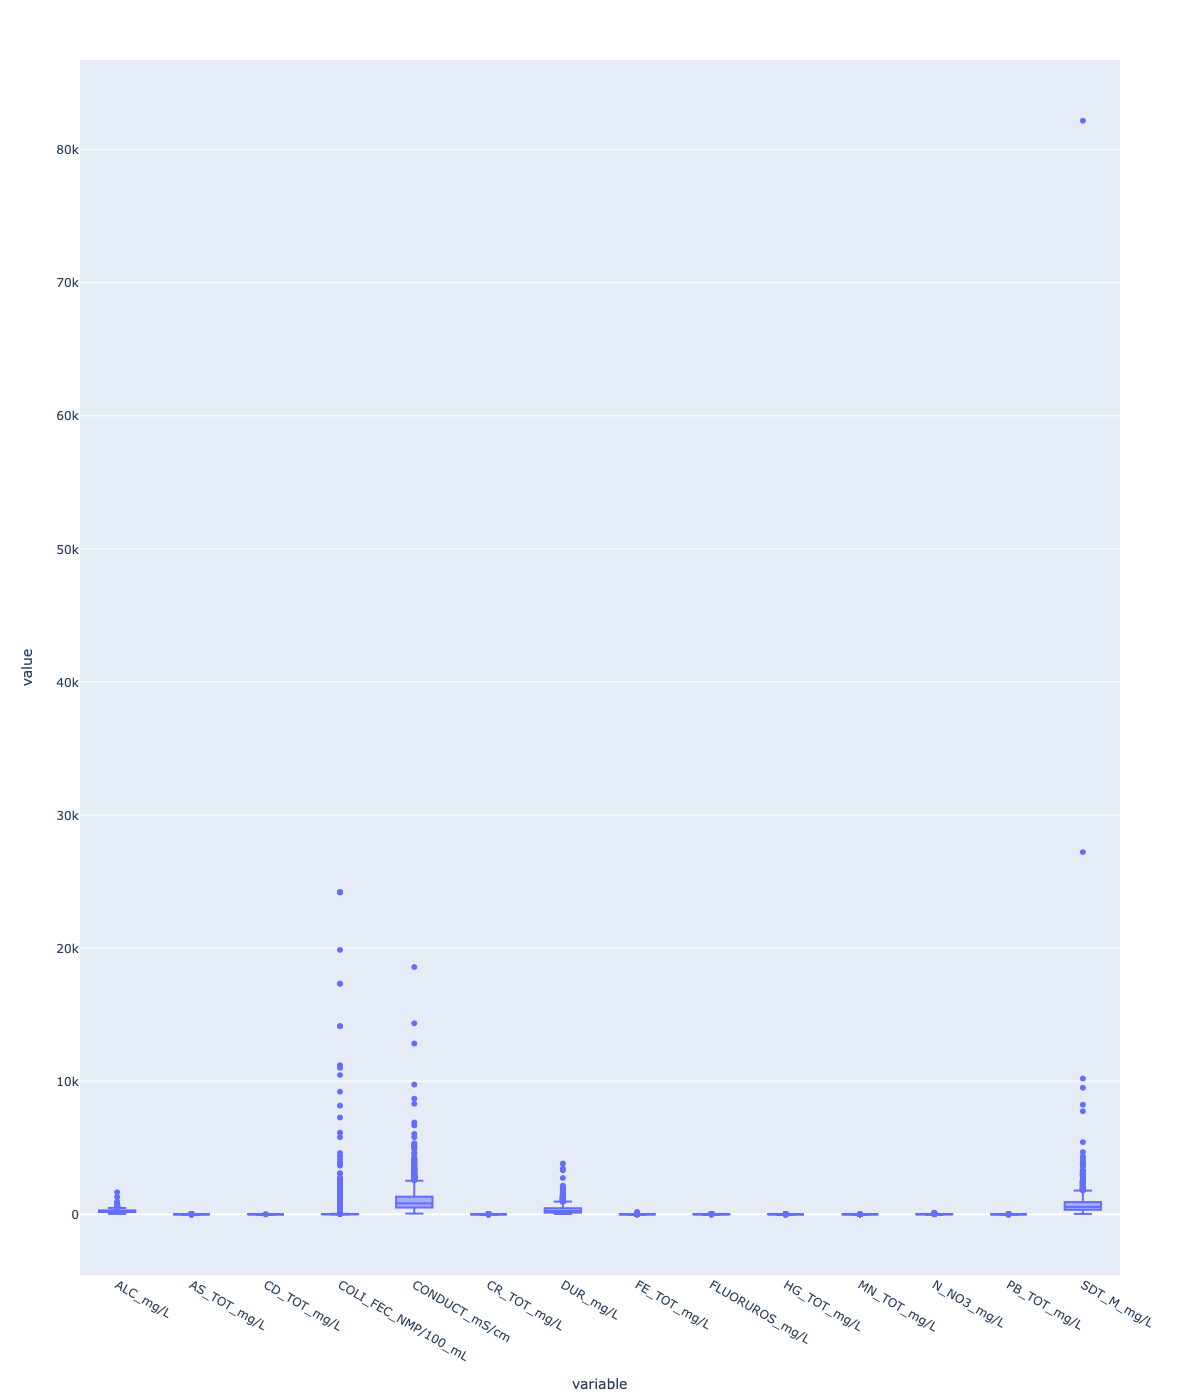

Identificar correlaciones.

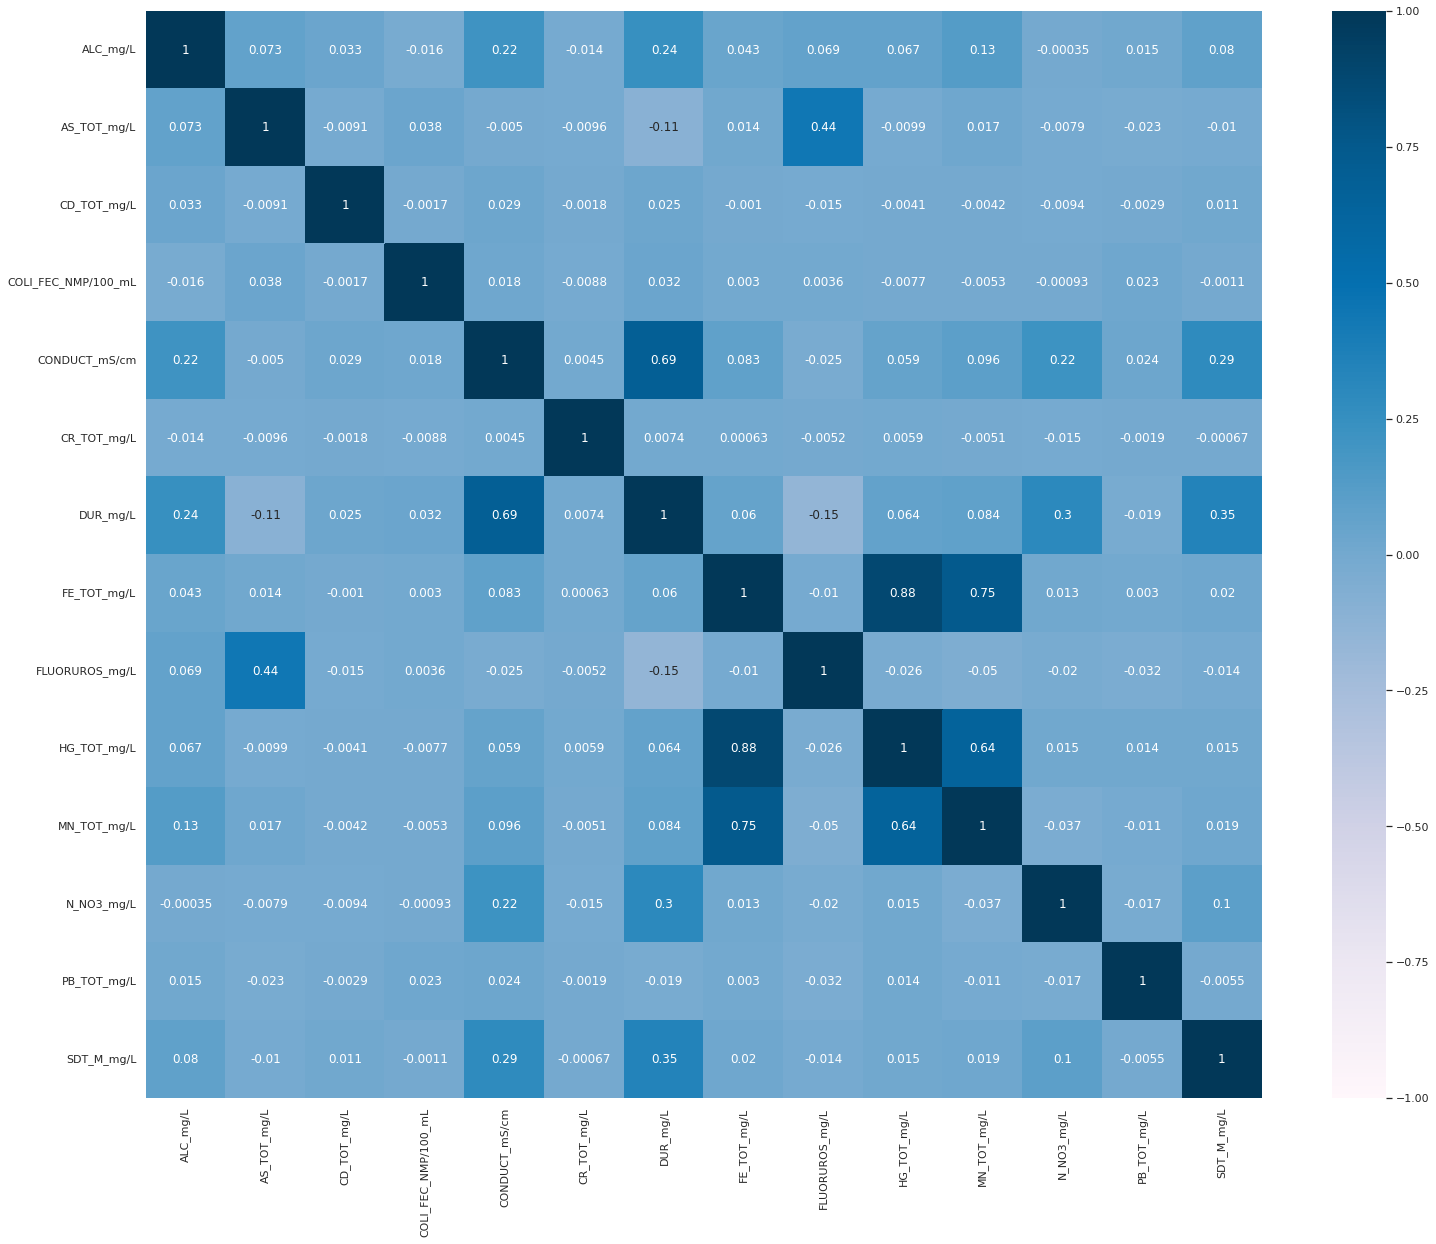

In [ ]:
corrs = df_num.corr() #variables numericas 
sns.set(rc = {'figure.figsize':(25,20)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "PuBu", annot= True)

##PARTE 3 - Análisis con K Means 

Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

In [ ]:
df_ubicacion = df_as[['LONGITUD','LATITUD']]
df_ubicacion#creamos un nuevo dataframe con las variables que nos sirven para localizar 
#el lugar donde se tomó cada muestra de agua subterránea

,LONGITUD,LATITUD
0,-102.02210,22.20887
1,-102.20075,21.99958
2,-102.28801,22.36685
3,-102.29449,22.18435
4,-110.24480,23.45138
...,...,...
1063,-99.54191,24.76036
1064,-99.70099,24.78280
1065,-99.82249,25.55197
1066,-100.32683,24.80118


In [ ]:
df_ubicacion["COORDENADAS"] = list(zip(df_ubicacion.LONGITUD, df_ubicacion.LATITUD))
df_ubicacion["COORDENADAS"] = df_ubicacion["COORDENADAS"].apply(Point)
df_ubicacion.head()#le agregamos una nueva columna a este dataframe para esa columna poder graficarla en un mapa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


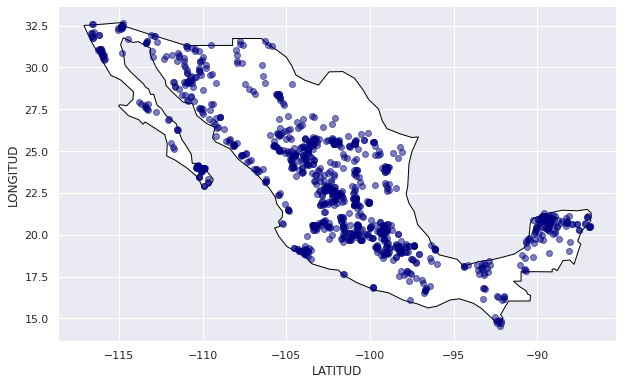

In [ ]:
gdf = gpd.GeoDataFrame(df_ubicacion, geometry="COORDENADAS")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

gdf.plot(ax=gax, color='navy', alpha = 0.5)
gdf

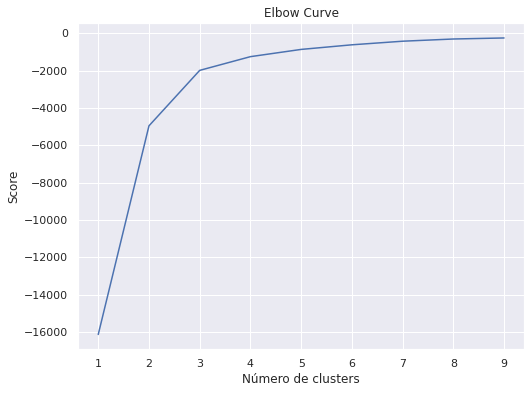

In [ ]:
k_clusters = range(1,10)
k_means = [KMeans(n_clusters=i) for i in k_clusters] #evaluamos que numero de clusters es conveniente según la ubicación de las muestras
Y = df_ubicacion[['LATITUD']]
X = df_ubicacion[['LONGITUD']]
score = [k_means[i].fit(Y).score(Y) for i in range(len(k_means))] 

plt.figure(figsize=(8,6))
plt.plot(k_clusters, score)
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
X = df[['LONGITUD', 'LATITUD']]
k_means = KMeans(n_clusters = 20).fit(X) #este valor de 20 será explicado más adelante. 
centroides = k_means.cluster_centers_
labels = k_means.predict(X)

coord = pd.DataFrame(centroides)

coord["Coordenadas"] = list(zip(coord[0], coord[1]))#transformar a lista
coord["Coordenadas"] = coord["Coordenadas"].apply(Point) #unimos la longitud y latitud en uno solo, como lo hicimos al inicio

geopanda_df= gpd.GeoDataFrame(coord, geometry="Coordenadas") #convertimos el dataframe en un geodataframe para poder graficarlo en un mapa
geopanda_df

,0,1,Coordenadas
0,-101.649766,25.410791,POINT (-101.64977 25.41079)
1,-97.549928,17.196103,POINT (-97.54993 17.19610)
2,-109.032816,26.492841,POINT (-109.03282 26.49284)
3,-89.627607,20.535159,POINT (-89.62761 20.53516)
4,-101.245950,20.166726,POINT (-101.24595 20.16673)
5,-110.813080,30.001222,POINT (-110.81308 30.00122)
6,-115.350697,31.630071,POINT (-115.35070 31.63007)
7,-97.751935,19.077840,POINT (-97.75194 19.07784)
8,-103.967152,25.116773,POINT (-103.96715 25.11677)
9,-99.502087,24.071606,POINT (-99.50209 24.07161)


In [ ]:
df['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [ ]:
df_ubicacion = df_ubicacion.join(df['SEMAFORO']) # > esta parte esta comentada debido a que el dataframe ya se había hecho al correr la celda por primera vez y se modificó permanentemente
df_ubicacion 

,LONGITUD,LATITUD,COORDENADAS,SEMAFORO
0,-102.02210,22.20887,POINT (-102.02210 22.20887),Verde
1,-102.20075,21.99958,POINT (-102.20075 21.99958),Verde
2,-102.28801,22.36685,POINT (-102.28801 22.36685),Rojo
3,-102.29449,22.18435,POINT (-102.29449 22.18435),Verde
4,-110.24480,23.45138,POINT (-110.24480 23.45138),Rojo
...,...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036),Rojo
1064,-99.70099,24.78280,POINT (-99.70099 24.78280),Rojo
1065,-99.82249,25.55197,POINT (-99.82249 25.55197),Rojo
1066,-100.32683,24.80118,POINT (-100.32683 24.80118),Verde


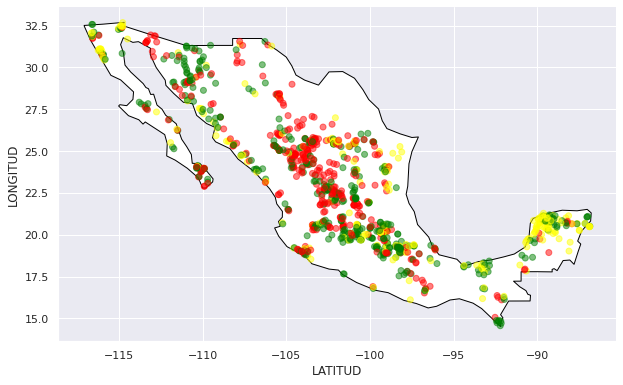

In [ ]:
gdf_new = gpd.GeoDataFrame(df_ubicacion, geometry="COORDENADAS")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

colores = {'Rojo':'red','Amarillo':'yellow','Verde':'green'}
world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

gdf_new.plot(ax=gax, color=df_ubicacion['SEMAFORO'].map(colores), alpha = 0.5)

Al observar el mapa podemos ver que no existe un patrón sobre la calidad del agua subterránea en el país, por lo que podemos concluir que el hecho de que el agua subterránea este limpia o no, no tiene mucho que ver con la ubicación de donde se obtuvo la muestra. 

Lo único que podríamos decir es que más o menos en los estados de Durango y Zacatecas existe una gran cantidad de muestras con nivel de contaminación alto, mientras que gran parte de las muestras tomadas en poblaciones de Querétaro e Hidalgo tienen nivel bajo de contaminación, lo mismo en el norte de Sonora. 

##PARTE 4 - Agrupamiento y Visualización con K Means 

Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.


In [ ]:
df_ubicacion['kmeans'] = k_means.labels_
df_ubicacion.loc[:, 'kmeans'].value_counts()

8     118
3      94
14     81
12     78
4      66
17     62
7      59
5      58
0      53
13     51
6      48
9      44
19     43
11     41
18     34
15     31
2      31
16     27
10     25
1      24
Name: kmeans, dtype: int64

En la celda anterior podemos obtener el número de muestras (k vecinos) que tiene cada kmeans, las cuales componen dicho cluster. 
La función k means busca ubicar cada uno de los centroides en el lugar donde tenga la menor distancia posible a cada una de las muestras, esto según el número de clusters que indiquemos. 

Entre más ordenados estén nuestras muestras en nuestro mapa (es decir, entre más juntas estén las muestras de cada color), menos cantidad de clusters necesitaremos. Sin embargo, como ya vimos en nuestro mapa, nuestros datos están muy desodernados y al menos a simple vista no parece haber un patrón muy claro de los datos respecto al lugar donde se tomó su muestra, por lo que decidimos cambiar nuestro numero de clusters de 3 a 20 para que nuestro mapa pueda mantener y graficar nuestros datos de la manera más real posible. 

In [ ]:
df_ubicacion

,LONGITUD,LATITUD,COORDENADAS,SEMAFORO,kmeans
0,-102.02210,22.20887,POINT (-102.02210 22.20887),Verde,12
1,-102.20075,21.99958,POINT (-102.20075 21.99958),Verde,12
2,-102.28801,22.36685,POINT (-102.28801 22.36685),Rojo,12
3,-102.29449,22.18435,POINT (-102.29449 22.18435),Verde,12
4,-110.24480,23.45138,POINT (-110.24480 23.45138),Rojo,18
...,...,...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036),Rojo,9
1064,-99.70099,24.78280,POINT (-99.70099 24.78280),Rojo,9
1065,-99.82249,25.55197,POINT (-99.82249 25.55197),Rojo,9
1066,-100.32683,24.80118,POINT (-100.32683 24.80118),Verde,9


In [ ]:
df_vecinos=df_ubicacion[['SEMAFORO','kmeans']]
df_vecinos#creamos un nuevo dataframe para obtener la frecuencia de los niveles en cada cluster

,SEMAFORO,kmeans
0,Verde,12
1,Verde,12
2,Rojo,12
3,Verde,12
4,Rojo,18
...,...,...
1063,Rojo,9
1064,Rojo,9
1065,Rojo,9
1066,Verde,9


In [ ]:
freq = df_vecinos.groupby(['kmeans', 'SEMAFORO']).size() 
print(freq)

kmeans  SEMAFORO
0       Amarillo    20
        Rojo        20
        Verde       13
1       Amarillo     4
        Rojo         9
        Verde       11
2       Amarillo    11
        Rojo         9
        Verde       11
3       Amarillo    58
        Rojo         4
        Verde       32
4       Amarillo    11
        Rojo        18
        Verde       37
5       Amarillo     3
        Rojo        15
        Verde       40
6       Amarillo    22
        Rojo        13
        Verde       13
7       Amarillo    14
        Rojo        12
        Verde       33
8       Amarillo     3
        Rojo        83
        Verde       32
9       Amarillo    16
        Rojo        14
        Verde       14
10      Amarillo     4
        Rojo         9
        Verde       12
11      Amarillo    13
        Rojo         6
        Verde       22
12      Amarillo     2
        Rojo        50
        Verde       26
13      Amarillo     9
        Rojo        22
        Verde       20
14      Amarillo 

Gracias a la celda anterior podemos obtener cuantas muestras de cada nivel de contaminación existe para cada cluster. De esta manera podemos obtener cual nivel del semáforo es el más frecuente en el cluster y con esto poder descubrir un patrón para cada cluster. 

La función one hot encoding es otra forma de observar estos datos 

In [ ]:
#crear la instancia
encoder = OneHotEncoder(handle_unknown='ignore')
#aplicar el one hot encoding
encoder_df = pd.DataFrame(encoder.fit_transform(df_vecinos[['SEMAFORO']]).toarray())
#unir las columnas del encoder con el df_vecinos 
final_df = df_vecinos.join(encoder_df)
final_df.columns = ['SEMAFORO', 'kmeans', 'Yellow', 'Red','Green']
final_df

,SEMAFORO,kmeans,Yellow,Red,Green
0,Verde,12,0.0,0.0,1.0
1,Verde,12,0.0,0.0,1.0
2,Rojo,12,0.0,1.0,0.0
3,Verde,12,0.0,0.0,1.0
4,Rojo,18,0.0,1.0,0.0
...,...,...,...,...,...
1063,Rojo,9,0.0,1.0,0.0
1064,Rojo,9,0.0,1.0,0.0
1065,Rojo,9,0.0,1.0,0.0
1066,Verde,9,0.0,0.0,1.0


De acuerdo a los resultados que obtuvimos de la frecuencia de los niveles de contaminación en cada cluster, podemos obtener el nivel del semáforo que más predomine en cada cluster y con ello crear los agrupamientos. 

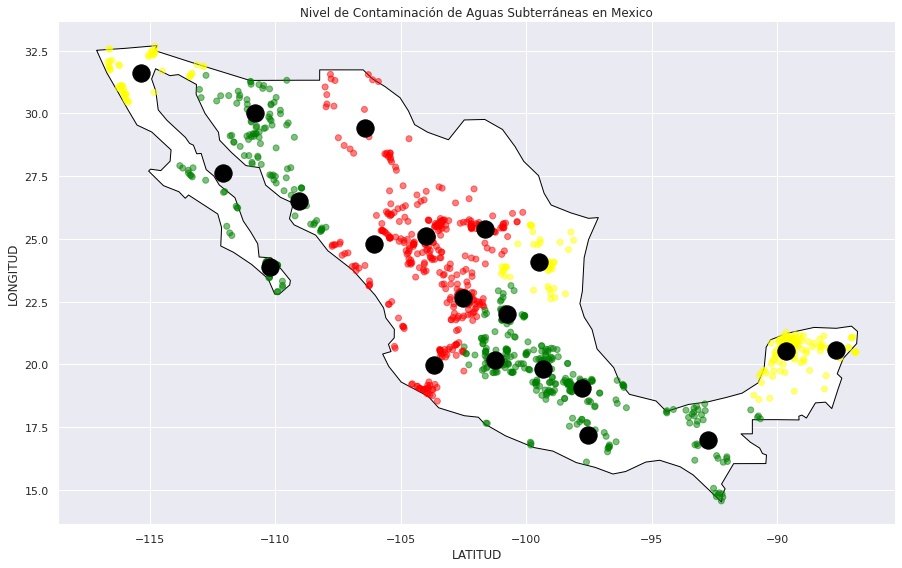

In [ ]:
fig, gax = plt.subplots(figsize=(15,10))
colores=['red', 'green', 'green', 'yellow', 'green', 'green', 'yellow', 'green', 'red', 'yellow', 'green', 'green', 'red','red','green', 'red', 'yellow', 'red', 'green', 'green']
color_ = [] #esta lista de colores corresponden al nivel del semáforo que predomina en cada cluster 

for row in labels:
  color_.append(colores[row])

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gdf_new.plot(ax=gax, color=color_, alpha = 0.5)
geopanda_df.plot(ax=gax, color='black',alpha = 1, markersize = 300) 

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')
gax.set_title('Nivel de Contaminación de Aguas Subterráneas en Mexico')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Gracias a las funciones de K Means podemos descubrir patrones dentro del conjunto de datos que quizá a simple vista no se ven y de esta forma poder ver que nivel de contaminación predomina más en una vecindad/región. 
El objetivo del agrupamiento es tener una información más general y resumida sobre la contaminación de una región respecto a los niveles de contaminación de cada uno de los elementos/vecinos que compongan dicha región. 
En el mapa anterior podemos observar que en el sur del país el agua subterránea mayormente tiene un nivel de contaminación baja, mientras que en la región centro del país hay un nivel alto. También es fácil visualizar que en la península de Yucatán predomina el agua subterránea con un nivel medio de contaminación.

#Reto Entrega 2 

##Clasificación - Ensambles

##Base de Datos de Aguas Subterráneas

-----------------------------------------------------------------------------------------

EQUIPO 68

Denisse Maria Ramirez Colmenero - A01561497

Emmanuel González Calitl - A01320739

-----------------------------------------------------------------------------------------

Materia: Ciencia y Analitica de Datos

Profesor titular: Dra. María de la Paz Rico Fernández 

Profesor tutor: Orlando Figón Cruz

Fecha: 18 de Noviembre de 2022

## PARTE 1 - Selecciona tus variables independientes X y dependiente Y (semáforo)

In [ ]:
df_limpio = df_num.copy()
df_limpio['y'] = df_as['SEMAFORO']
df_limpio

,ALC_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,COLI_FEC_NMP/100_mL,CONDUCT_mS/cm,CR_TOT_mg/L,DUR_mg/L,FE_TOT_mg/L,FLUORUROS_mg/L,HG_TOT_mg/L,MN_TOT_mg/L,N_NO3_mg/L,PB_TOT_mg/L,SDT_M_mg/L,y
0,229.990,0.0161,0.003,1.1,940.0,0.005,213.7320,0.08910,0.9766,0.0005,0.00150,4.184656,0.005,603.6000,Verde
1,231.990,0.0134,0.003,1.1,608.0,0.005,185.0514,0.02500,0.9298,0.0005,0.00150,5.750110,0.005,445.4000,Verde
2,204.920,0.0370,0.003,1.1,532.0,0.005,120.7190,0.02500,1.8045,0.0005,0.00150,1.449803,0.005,342.0000,Rojo
3,327.000,0.0154,0.003,1.1,686.0,0.005,199.8790,0.02500,1.1229,0.0005,0.00150,1.258597,0.005,478.6000,Verde
4,309.885,0.0100,0.003,291.0,1841.0,0.005,476.9872,0.02500,0.2343,0.0005,0.00150,15.672251,0.005,1179.0000,Rojo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,0.0100,0.003,1.1,2350.0,0.005,752.0960,0.02500,0.2000,0.0005,0.00150,14.615488,0.005,1545.8000,Rojo
1064,256.000,0.0100,0.003,1.1,529.0,0.005,273.0000,0.07578,0.2000,0.0005,0.00709,77.392000,0.005,297.0000,Rojo
1065,330.690,0.0100,0.003,620.0,2600.0,0.005,660.2126,0.21290,0.7574,0.0005,0.02420,36.477104,0.005,1873.0000,Rojo
1066,193.140,0.0100,0.003,1.1,873.0,0.005,406.3680,0.17860,0.7108,0.0005,0.01200,0.020000,0.005,690.6667,Verde


In [ ]:
df_limpio.dtypes 

ALC_mg/L               float64
AS_TOT_mg/L            float64
CD_TOT_mg/L            float64
COLI_FEC_NMP/100_mL    float64
CONDUCT_mS/cm          float64
CR_TOT_mg/L            float64
DUR_mg/L               float64
FE_TOT_mg/L            float64
FLUORUROS_mg/L         float64
HG_TOT_mg/L            float64
MN_TOT_mg/L            float64
N_NO3_mg/L             float64
PB_TOT_mg/L            float64
SDT_M_mg/L             float64
y                       object
dtype: object

In [ ]:
# DEFINICIÓN DE VARIABLES

X = df_limpio.loc[:, df_limpio.columns != 'y'] #Variables de entrada 

y = df_limpio["y"] #VARIABLE DE SALIDA

X

,ALC_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,COLI_FEC_NMP/100_mL,CONDUCT_mS/cm,CR_TOT_mg/L,DUR_mg/L,FE_TOT_mg/L,FLUORUROS_mg/L,HG_TOT_mg/L,MN_TOT_mg/L,N_NO3_mg/L,PB_TOT_mg/L,SDT_M_mg/L
0,229.990,0.0161,0.003,1.1,940.0,0.005,213.7320,0.08910,0.9766,0.0005,0.00150,4.184656,0.005,603.6000
1,231.990,0.0134,0.003,1.1,608.0,0.005,185.0514,0.02500,0.9298,0.0005,0.00150,5.750110,0.005,445.4000
2,204.920,0.0370,0.003,1.1,532.0,0.005,120.7190,0.02500,1.8045,0.0005,0.00150,1.449803,0.005,342.0000
3,327.000,0.0154,0.003,1.1,686.0,0.005,199.8790,0.02500,1.1229,0.0005,0.00150,1.258597,0.005,478.6000
4,309.885,0.0100,0.003,291.0,1841.0,0.005,476.9872,0.02500,0.2343,0.0005,0.00150,15.672251,0.005,1179.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,0.0100,0.003,1.1,2350.0,0.005,752.0960,0.02500,0.2000,0.0005,0.00150,14.615488,0.005,1545.8000
1064,256.000,0.0100,0.003,1.1,529.0,0.005,273.0000,0.07578,0.2000,0.0005,0.00709,77.392000,0.005,297.0000
1065,330.690,0.0100,0.003,620.0,2600.0,0.005,660.2126,0.21290,0.7574,0.0005,0.02420,36.477104,0.005,1873.0000
1066,193.140,0.0100,0.003,1.1,873.0,0.005,406.3680,0.17860,0.7108,0.0005,0.01200,0.020000,0.005,690.6667


##PARTE 2 - Cambia a label encoding el semáforo, ej, de ['clase 1', 'clase 2', 'clase 3'] a [1,2,3]

In [ ]:
df_limpio['y'] = df_limpio['y'].astype('category')
df_limpio['y'] = df_limpio['y'].cat.codes

In [ ]:
df_limpio['y'].value_counts()


2    434
1    387
0    247
Name: y, dtype: int64

0: Amarillo

1: Rojo

2: Verde

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



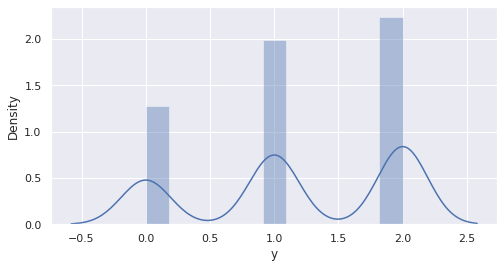

In [ ]:
sns.set(rc={"figure.figsize": (8, 4)})
sns.distplot(df_limpio['y'])

Tenemos clases desbalanceadas, más datos de los colores verdes y rojos.

##PARTE 3 - Realiza una análisis general de las feature importances a través de decision trees o random forest.

In [ ]:
Xtrain, Xtest, Ytrain, Ytest =  train_test_split(X,y, train_size = 0.7, random_state = 42) 

In [ ]:
model = DecisionTreeClassifier(random_state=12345, max_depth=8,class_weight='balanced') 
model.fit(Xtrain,Ytrain)
model.feature_importances_

array([4.75070327e-02, 9.93320013e-02, 0.00000000e+00, 1.14297451e-01,
       0.00000000e+00, 1.12234096e-02, 1.83450661e-01, 1.04958681e-01,
       2.13270890e-01, 3.27821515e-03, 7.33978534e-02, 1.32954282e-01,
       1.63295225e-02, 1.60591674e-16])

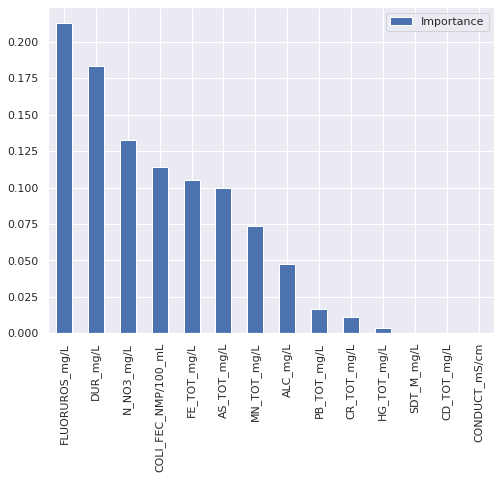

In [ ]:
feat_importances = pd.DataFrame(model.feature_importances_, index = Xtrain.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

##PARTE 4 - Selecciona las variables de mayor importancia 

Se selccionan las variables de entrada solo con un valor de importancia mayor a 0.1, ya que son las que afectan en mayor manera a la calidad del agua. 

In [ ]:
df_num2 = df_limpio[{'FLUORUROS_mg/L', 'DUR_mg/L', 'N_NO3_mg/L', 'COLI_FEC_NMP/100_mL', 'FE_TOT_mg/L'}]

Estas variables juntan el 75% de la varianza total explicada

##PARTE 5 - Realiza tu clasificador, recuerda dividir los datos de manera balanceada, (auxiliate de train test split)

Comenzamos con Decission Tree:

In [ ]:
X_DT = df_num2 #Variables de entrada 

y_DT = df_limpio["y"] #VARIABLE DE SALIDA

In [ ]:
Xtrain_DT, Xtest_DT, Ytrain_DT, Ytest_DT =  train_test_split(X_DT,y_DT, train_size = 0.7, random_state = 42) 

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(Xtrain_DT,Ytrain_DT)
y_pred_tree=tree.predict(Xtest_DT)
Xtrain_DT

,COLI_FEC_NMP/100_mL,N_NO3_mg/L,FLUORUROS_mg/L,FE_TOT_mg/L,DUR_mg/L
543,1.1,3.557929,0.8954,0.02500,141.4320
576,1.1,10.577071,0.6064,0.07790,808.7520
424,1.1,1.630000,0.4000,0.08868,406.0000
602,1.1,9.159429,0.2382,0.07560,306.7680
352,1.1,0.904700,0.2000,0.16500,440.1100
...,...,...,...,...,...
330,1.1,0.043000,1.6185,0.17690,45.3900
466,1.1,1.522011,3.2470,0.02500,53.8542
121,1.1,6.168069,0.3560,0.02500,534.5528
1044,1.1,3.218500,0.2158,0.24112,653.2600


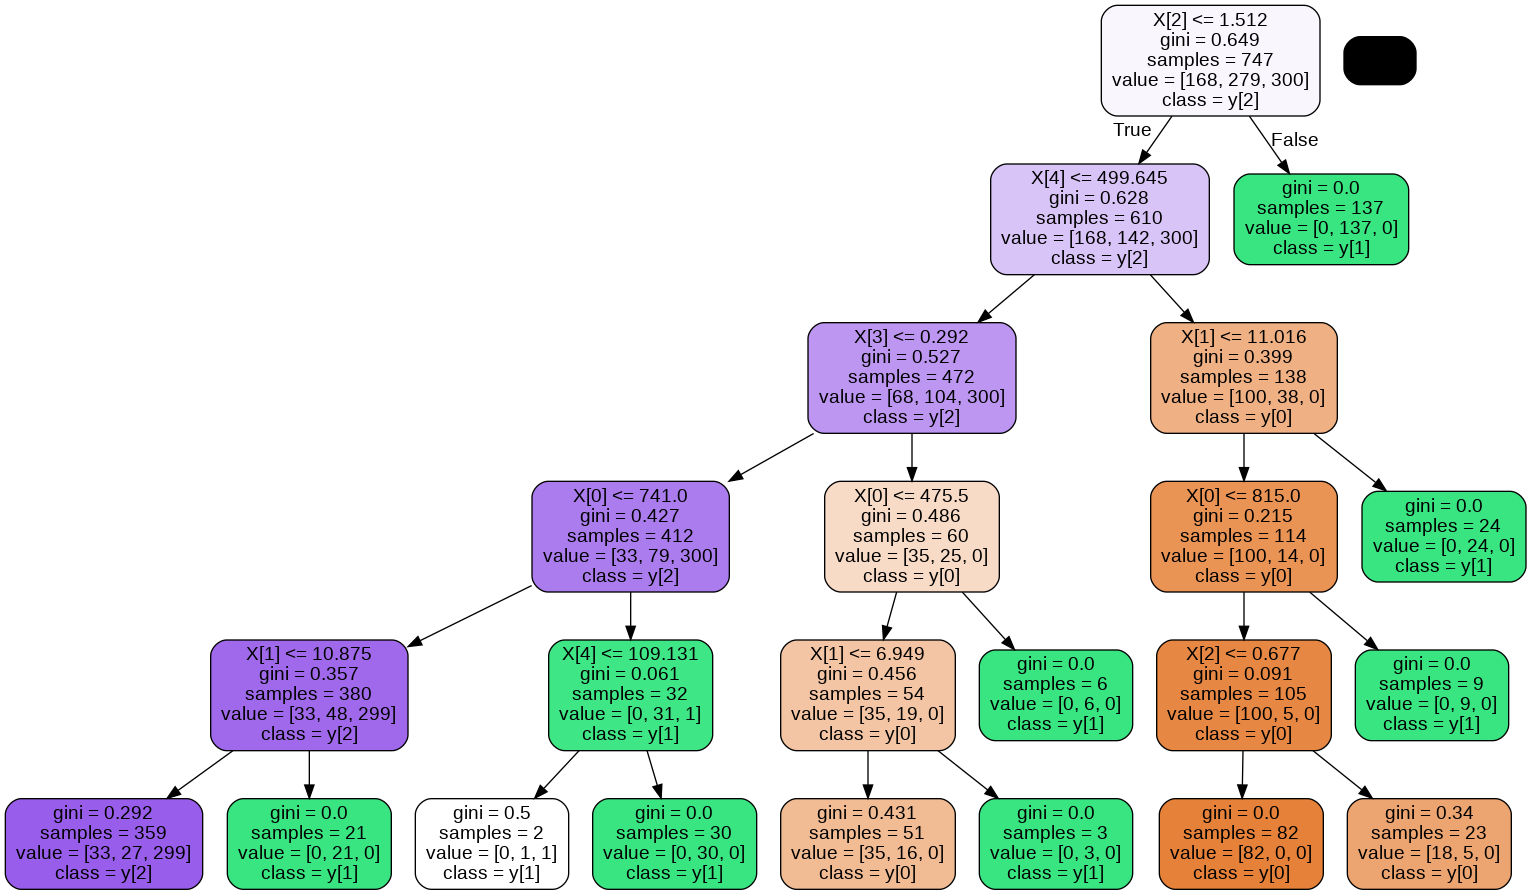

In [ ]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, 
                           out_file=None,
                           class_names = True, 
                           rounded=True,
                           filled=True)

import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('semaforo_tree.png')
Image(filename='semaforo_tree.png')

Gracias a la visualización de nuestro árbol de decisiones podemos notar como cada uno de nuestros features importances contribuyen a la clasificación de las observaciones. Podemos notar también como la clase 1, la cual representa el semáforo en rojo, es la que el modelo clasifica con mayor facilidad, clasificandola desde la primera raíz del decision tree, mientras que para clasificar la clase 0 y 2 (amarillo y verde) le cuesta un poco más.

Random Forest: 

In [ ]:
forest = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42, class_weight='balanced')
forest.fit(Xtrain_DT,Ytrain_DT)
y_pred_forest=forest.predict(Xtest_DT)

##PARTE 6 - Explora que clasificador es el más optimo: Decision trees o Random Forest

In [ ]:
from sklearn import metrics

print("Accuracy of Decision Tree:",metrics.accuracy_score(Ytest_DT, y_pred_tree))
print("Precision of Decision Tree:",metrics.precision_score(Ytest_DT, y_pred_tree, average='macro'))
print("Recall of Decision Tree:",metrics.recall_score(Ytest_DT, y_pred_tree, average='macro'))

Accuracy of Decision Tree: 0.8660436137071651
Precision of Decision Tree: 0.8799581757114617
Recall of Decision Tree: 0.849819701305941


In [ ]:
print("Accuracy of Random Forest:",metrics.accuracy_score(Ytest_DT, y_pred_forest))
print("Precision of Random Forest:",metrics.precision_score(Ytest_DT, y_pred_forest, average='macro'))
print("Recall of Random Forest:",metrics.recall_score(Ytest_DT, y_pred_forest, average='macro'))

Accuracy of Random Forest: 0.8660436137071651
Precision of Random Forest: 0.87285604690668
Recall of Random Forest: 0.8538822530572641


Luego de realizar los dos modelos y obtener los valores de cada uno para las métricas Accuracy, Precision y Recall, podemos notar lo siguiente:

* Los valores de las métricas muestran un buen desempeño de sus modelos y son muy similares entre ellas, por lo que utilizar cualquiera de los modelos sería un muy buena opción. 

* El modelo de Decision Tree es más computacionalmente más rápido y sobre todo más fácil de comprender ya que al visualizarlo, podemos observar como el modelo va divide las muestras en las diferentes clases y como cada feature va contribuyendo en la clasificación. Además podemos jugar con el modelo seleccionando el nivel de profundidad y observar como la impureza (gini)en cada clasificación va disminuyendo. 

* Por otro lado, sabemos que Random Forest es mejor para prevenir el overfitting al crear árboles en subconjuntos aleatorios. Sin embargo, un Decision Tree como esté, el cuando no tiene mucha profundidad, no es probable que caiga en el overfitting ya que no se está ajustando demasiado al dataset original. 

En base a esto podemos concluir que el clasificador más optimo para este caso es el Decision Tree. 

##PARTE 7 - Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall

Reporte de Clasificación: 

Hacemos un resumen de los desempeños de los modelos Decision Tree y Random Forest a partir de las métricas Precision, Recall y F1-Score. 

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2']
print("PARA DECISION TREE")
print(classification_report(Ytest_DT, y_pred_tree, target_names=target_names))

PARA DECISION TREE
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        79
           1       0.99      0.79      0.88       108
           2       0.81      0.98      0.89       134

    accuracy                           0.87       321
   macro avg       0.88      0.85      0.86       321
weighted avg       0.88      0.87      0.87       321



In [ ]:
target_names = ['0', '1', '2']
print("PARA RANDOM FOREST")
print(classification_report(Ytest_DT, y_pred_forest, target_names=target_names))

PARA RANDOM FOREST
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        79
           1       0.98      0.80      0.88       108
           2       0.83      0.96      0.89       134

    accuracy                           0.87       321
   macro avg       0.87      0.85      0.86       321
weighted avg       0.88      0.87      0.87       321



Curva Precision-Recall para el modelo de Decision Tree 

In [ ]:
Xpr = df_num2 #Variables de entrada 

ypr = df_limpio["y"] #VARIABLE DE SALIDA

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from yellowbrick.classifier import PrecisionRecallCurve

Xpr = OrdinalEncoder().fit_transform(Xpr)
ypr = LabelEncoder().fit_transform(ypr)

In [ ]:
Xtrain_pr, Xtest_pr, Ytrain_pr, Ytest_pr =  train_test_split(Xpr, ypr, train_size = 0.7, random_state = 42) 

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/prcurve.py:257: YellowbrickWarning:

micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging



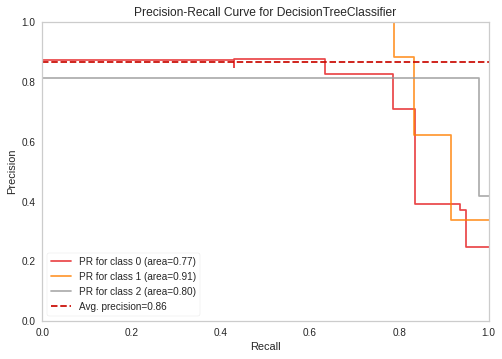

In [ ]:
viz = PrecisionRecallCurve(
    tree,
    per_class=True,
    cmap="Set1"
)
viz.fit(Xtrain_pr, Ytrain_pr)
viz.score(Xtest_pr, Ytest_pr)
viz.show()

Una curva PR (precisión-recall) es una métrica de desempeño muy útil especialmente para clases desbalanceadas como la nuestra. Nos ayuda a evaluar nuestra precisión (la cual mide la tasa de predicciones positivas correctas) con respecto al recall (tasa de verdaderos positivos).

Recordemos que: 

Precision = VP / VP + FP 

Recall = VP / VP + FN

Para que nuestro modelo sea considerado bueno, necesitamos que para cada uno de nuestras clases, tanto precision como recall tengan valores aceptables. En nuestro caso podemos ver que nuestras 3 clases tienen un buen valor de área bajo la curva, con un promedio de precision del 86% por lo que podríamos concluir que el modelo de Decision Tree es una muy buena opción para predecir las clases en este problema de clasificación. 

Podemos notar que para la clase 0 (la cual representa el semáforo en color amarillo) es donde el modelo más le cuesta predecir, mientras que para la clase 1 (semáforo en rojo) lo hace de muy buena manera. Esto era de esperarse ya que la clase 0 - amarillo tiene su rango de los valores de las variables numéricas en medio de los rangos de las otras dos clases por lo que le cuesta más decidir a que clase pertenece cada observación. Por otro lado, cuando los valores de dichas variables dependientes sean altos, automáticamente podemos saber que se trata de una muestra con un nivel de contaminación alto.  

##PARTE 8 - Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión 

Matriz de Confusión para el modelo de Decision Tree

0 = Amarillo 1 = Rojo  2 = Verde


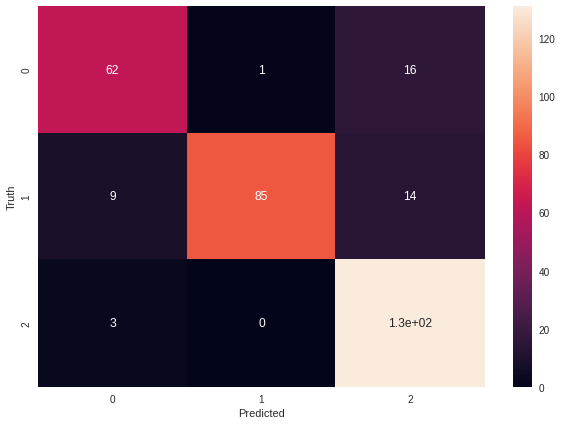

In [ ]:
cm = confusion_matrix(Ytest_DT, y_pred_tree)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print("0 = Amarillo 1 = Rojo  2 = Verde")

Nuestra matriz de confusión nos dice lo siguiente: 

* De los 79 registros de la clase 0 (Amarillo), 62 los clasificó como tal. (recall = 62 / 62+1+16 = 0.78)

* De los 108 registros de la clase 1 (Rojo), 85 los clasificó como tal. (recall = 85 / 85+9+14 = 0.79)

* De los 134 registros de la clase 2 (Verde), 130 los clasificó como tal. (recall = 130 / 130+3 = 0.98)

Como conclusión podemos decir que los resultados del reporte de clasificación y la curva PR concuerdan con los resultados de la matriz de confusión. Como comentamos anteriormente tanto Decision Tree como Random Forest tuvieron muy buenos resultados y ambos son buenos modelos para resolver este problema de clasificación, únicamente decidimos visualizar la curva y la matriz de confusión para Decision Tree simplemente porque consideramos que es un modelo más fácil de comprender.

----------------------------------------------------------------------------------------

Esta actividad fue de gran ayuda para comprender como realizar un modelo de clasificación y como la curva PR y la matriz de confusión cambian al tratarse de un problema multiclase. Consideramos que el conjunto de datos que utilizamos para este reto fue uno de los datasets más interesantes de todos los que utilizamos en este trimestre ya que pudimos observar la aplicación de los modelos de clasificación para un problema real. Además este dataset fue bastante flexible para manipular y nos permitió explorarlo a fondo y aplicar todas las herramientas que vimos durante el curso: limpieza, visualización, agrupamiento K-Means, modelos, métricas de desempeño, curva PR y matriz de confusión. Sin duda nos llevamos bastantes conocimientos que nos serán de gran utilidad para las siguientes materias. 

REFERENCIAS: 

1. plot different color for different categorical levels using matplotlib. (s. f.). NewbeDEV. https://newbedev.com/plot-different-color-for-different-categorical-levels-using-matplotlib

2. Waheed, A. (2020, 25 junio). Cómo contar la frecuencia con la que un valor se produce en Pandas DataFrame. Delft Stack. https://www.delftstack.com/es/howto/python-pandas/how-to-count-the-frequency-a-value-occurs-in-pandas-dataframe/

3. Radečić, D. (2022, 20 enero). 3 Essential Ways to Calculate Feature Importance in Python. Better Data Science. https://betterdatascience.com/feature-importance-python/

4. How to plot feature_importance for DecisionTreeClassifier? (2021, 5 septiembre). Stack Overflow. https://stackoverflow.com/questions/69061767/how-to-plot-feature-importance-for-decisiontreeclassifier

5. Logunova, I. (2022, 23 junio). Random Forest Classifier: Basic Principles and Applications. Serokell Software Development Company. https://serokell.io/blog/random-forest-classification

6. Falcón, L. E. (s. f.). Taxonomía de las métricas de Clasificación [Diapositivas]. Canvas Experiencia 21. https://experiencia21.tec.mx/courses/320441/pages/lectura-teoria-bayes-ingenuo-y-vecino-mas-cercano?module_item_id=19377609